<a href="https://colab.research.google.com/github/jovanka2021/lifehappiness/blob/main/Study_Case_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import library
import pandas as pd
import numpy as np

# define variable
path_file = '/content/sample_data/covid_data.csv'

# creat dataframe
# .read_csv() atau .read_excel()>>data kita adri excel, .DataFrame()>>untuk json
df = pd.read_csv(path_file)
df

,location_key,date,place_id,wikidata_id,country_code,country_name,new_confirmed,new_deceased,new_persons_vaccinated,new_persons_fully_vaccinated
0,ID_SG,2021-01-01,ChIJg3FrC97smC0R7aQEn0N8HWI,Q5075,ID,Indonesia,79.0,0.0,NaN,NaN
1,ID_AC_1104,2021-01-01,ChIJb_UQ-jJeNzARUMwgsoCdAwM,Q5675,ID,Indonesia,0.0,0.0,NaN,NaN
2,ID_AC_1115,2021-01-01,ChIJNyiO4RExOTAR0M4gsoCdAwM,Q5746,ID,Indonesia,0.0,0.0,NaN,NaN
3,ID_AC_1174,2021-01-01,ChIJo13gOQSFNzAREMwgsoCdAwM,Q5781,ID,Indonesia,0.0,0.0,NaN,NaN
4,ID_BA_5171,2021-01-01,ChIJ24BeDptA0i0RSje5zOg0c-I,Q11506,ID,Indonesia,17.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
161401,ID_SG_7403,2021-10-21,ChIJozO1a5JKoi0R0HH3yvsLAwM,Q15363,ID,Indonesia,NaN,NaN,NaN,NaN
161402,ID_JA_1507,2021-10-21,ChIJFxpQOk7nJS4RpHqc4AQCEqw,Q7384,ID,Indonesia,NaN,NaN,NaN,NaN
161403,ID_LA_1809,2021-10-21,ChIJbUWZ5Y_WQC4RkvrR6z33KkE,Q8144,ID,Indonesia,NaN,NaN,NaN,NaN
161404,ID_LA_1802,2021-10-21,ChIJWWsDAMtXPy4R8M8gsoCdAwM,Q8135,ID,Indonesia,NaN,NaN,NaN,NaN


In [3]:
# column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161406 entries, 0 to 161405
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   location_key                  161406 non-null  object 
 1   date                          161406 non-null  object 
 2   place_id                      159348 non-null  object 
 3   wikidata_id                   159348 non-null  object 
 4   country_code                  161406 non-null  object 
 5   country_name                  161406 non-null  object 
 6   new_confirmed                 86929 non-null   float64
 7   new_deceased                  86929 non-null   float64
 8   new_persons_vaccinated        234 non-null     float64
 9   new_persons_fully_vaccinated  228 non-null     float64
dtypes: float64(4), object(6)
memory usage: 12.3+ MB


In [4]:
# data cleansing
df.isnull().sum()

location_key                         0
date                                 0
place_id                          2058
wikidata_id                       2058
country_code                         0
country_name                         0
new_confirmed                    74477
new_deceased                     74477
new_persons_vaccinated          161172
new_persons_fully_vaccinated    161178
dtype: int64

In [5]:
# to replace NULL or NaN value with .fillna()
df['new_confirmed'] = df['new_confirmed'].fillna(0)
df['new_deceased'] = df['new_deceased'].fillna(0)

# example numpy
df['new_persons_vaccinated'] = np.where(df['new_persons_vaccinated'].isnull(), 0, df['new_persons_vaccinated'])

df['new_persons_fully_vaccinated'] = np.where(df['new_persons_fully_vaccinated'].isnull(), 0, df['new_persons_fully_vaccinated'])

df.isnull().sum()


location_key                       0
date                               0
place_id                        2058
wikidata_id                     2058
country_code                       0
country_name                       0
new_confirmed                      0
new_deceased                       0
new_persons_vaccinated             0
new_persons_fully_vaccinated       0
dtype: int64

In [6]:
# date column change data type to date type, using, pd.to_datetime()
df['date'] = pd.to_datetime(df['date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161406 entries, 0 to 161405
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   location_key                  161406 non-null  object        
 1   date                          161406 non-null  datetime64[ns]
 2   place_id                      159348 non-null  object        
 3   wikidata_id                   159348 non-null  object        
 4   country_code                  161406 non-null  object        
 5   country_name                  161406 non-null  object        
 6   new_confirmed                 161406 non-null  float64       
 7   new_deceased                  161406 non-null  float64       
 8   new_persons_vaccinated        161406 non-null  float64       
 9   new_persons_fully_vaccinated  161406 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 12.3+ MB


In [8]:
# data visualisation
# .groupby

new_df = df.groupby('date').agg({'new_confirmed':'sum'})
new_df

,new_confirmed
date,
2021-01-01,23440.0
2021-01-02,21332.0
2021-01-03,20445.0
2021-01-04,20100.0
2021-01-05,22433.0
...,...
2021-10-17,1494.0
2021-10-18,1252.0
2021-10-19,1806.0


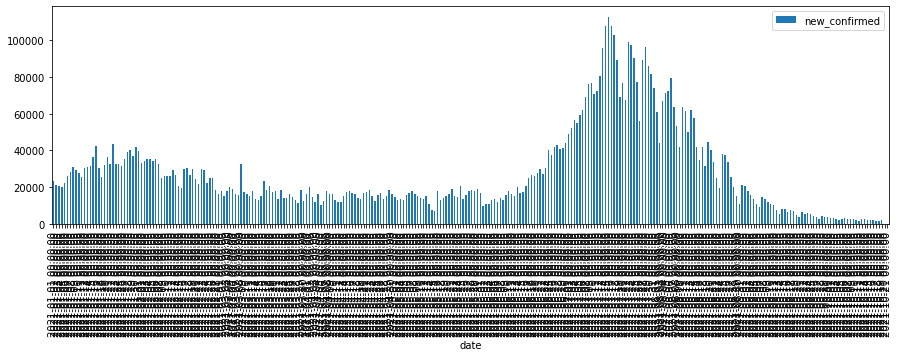

In [10]:
# .plot.bar(bar chart) dan .plot(time series)
new_df.plot.bar(figsize = (15,4))

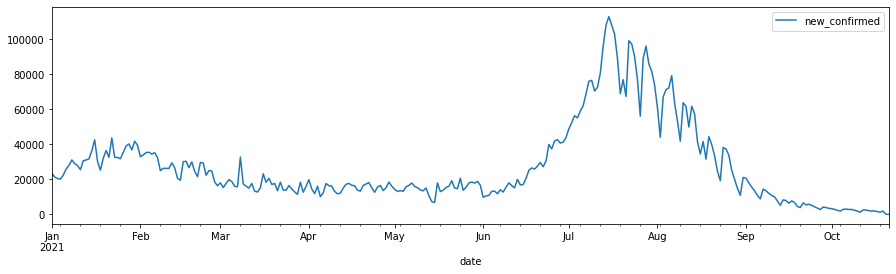

In [11]:
# time series
new_df.plot(figsize = (15,4))